In [6]:

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [7]:
df = pd.read_csv("diabetes.csv")



In [8]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
326,1,122,64,32,156,35.1,0.692,30,1
648,11,136,84,35,130,28.3,0.260,42,1
278,5,114,74,0,0,24.9,0.744,57,0
399,3,193,70,31,0,34.9,0.241,25,1
126,3,120,70,30,135,42.9,0.452,30,0
625,4,90,88,47,54,37.7,0.362,29,0
533,6,91,0,0,0,29.8,0.501,31,0
472,0,119,66,27,0,38.8,0.259,22,0
654,1,106,70,28,135,34.2,0.142,22,0
73,4,129,86,20,270,35.1,0.231,23,0


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
cols = ['Insulin','Glucose','BloodPressure','SkinThickness','BMI']
df[cols] = df[cols].replace(0,np.nan)


In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [79]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [56]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


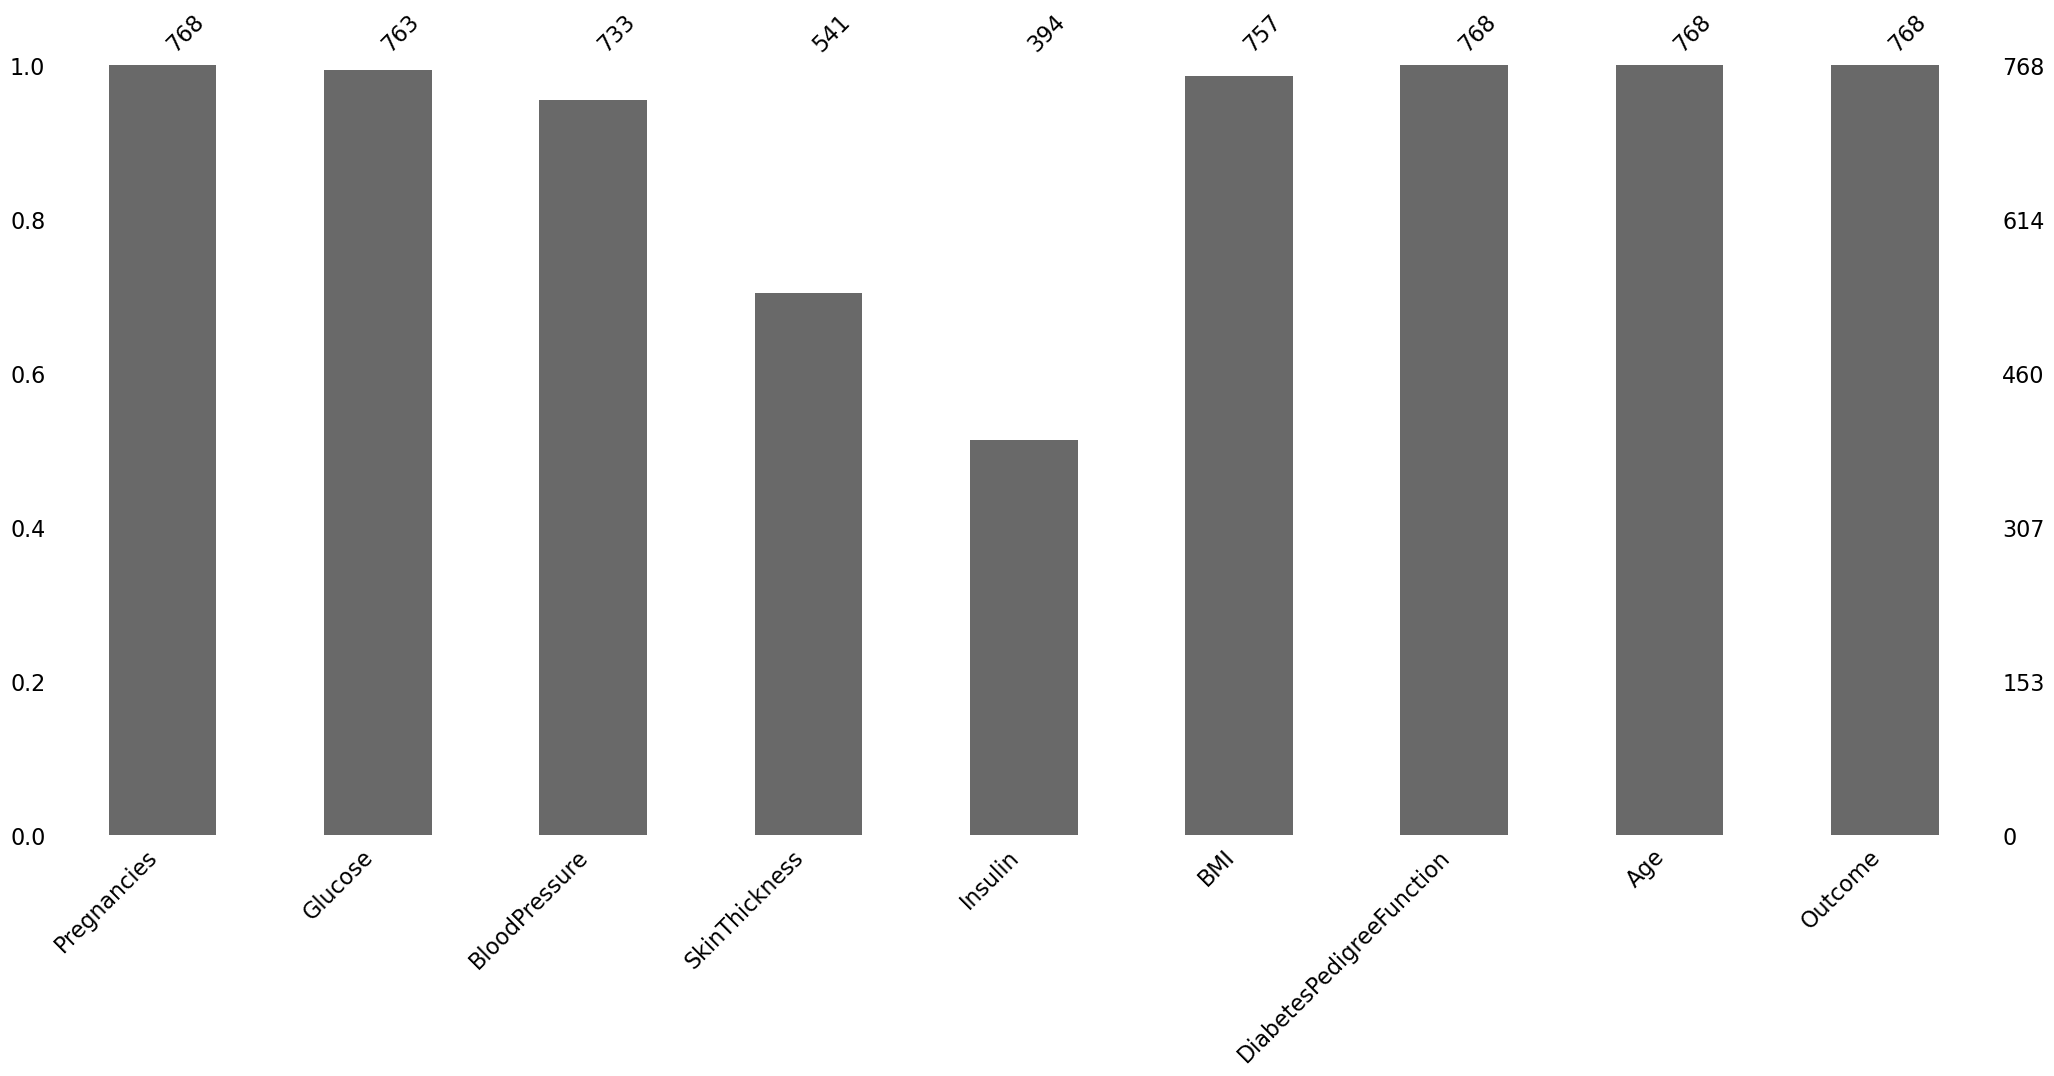

In [16]:
import missingno as msno
msno.bar(df);


<Axes: >

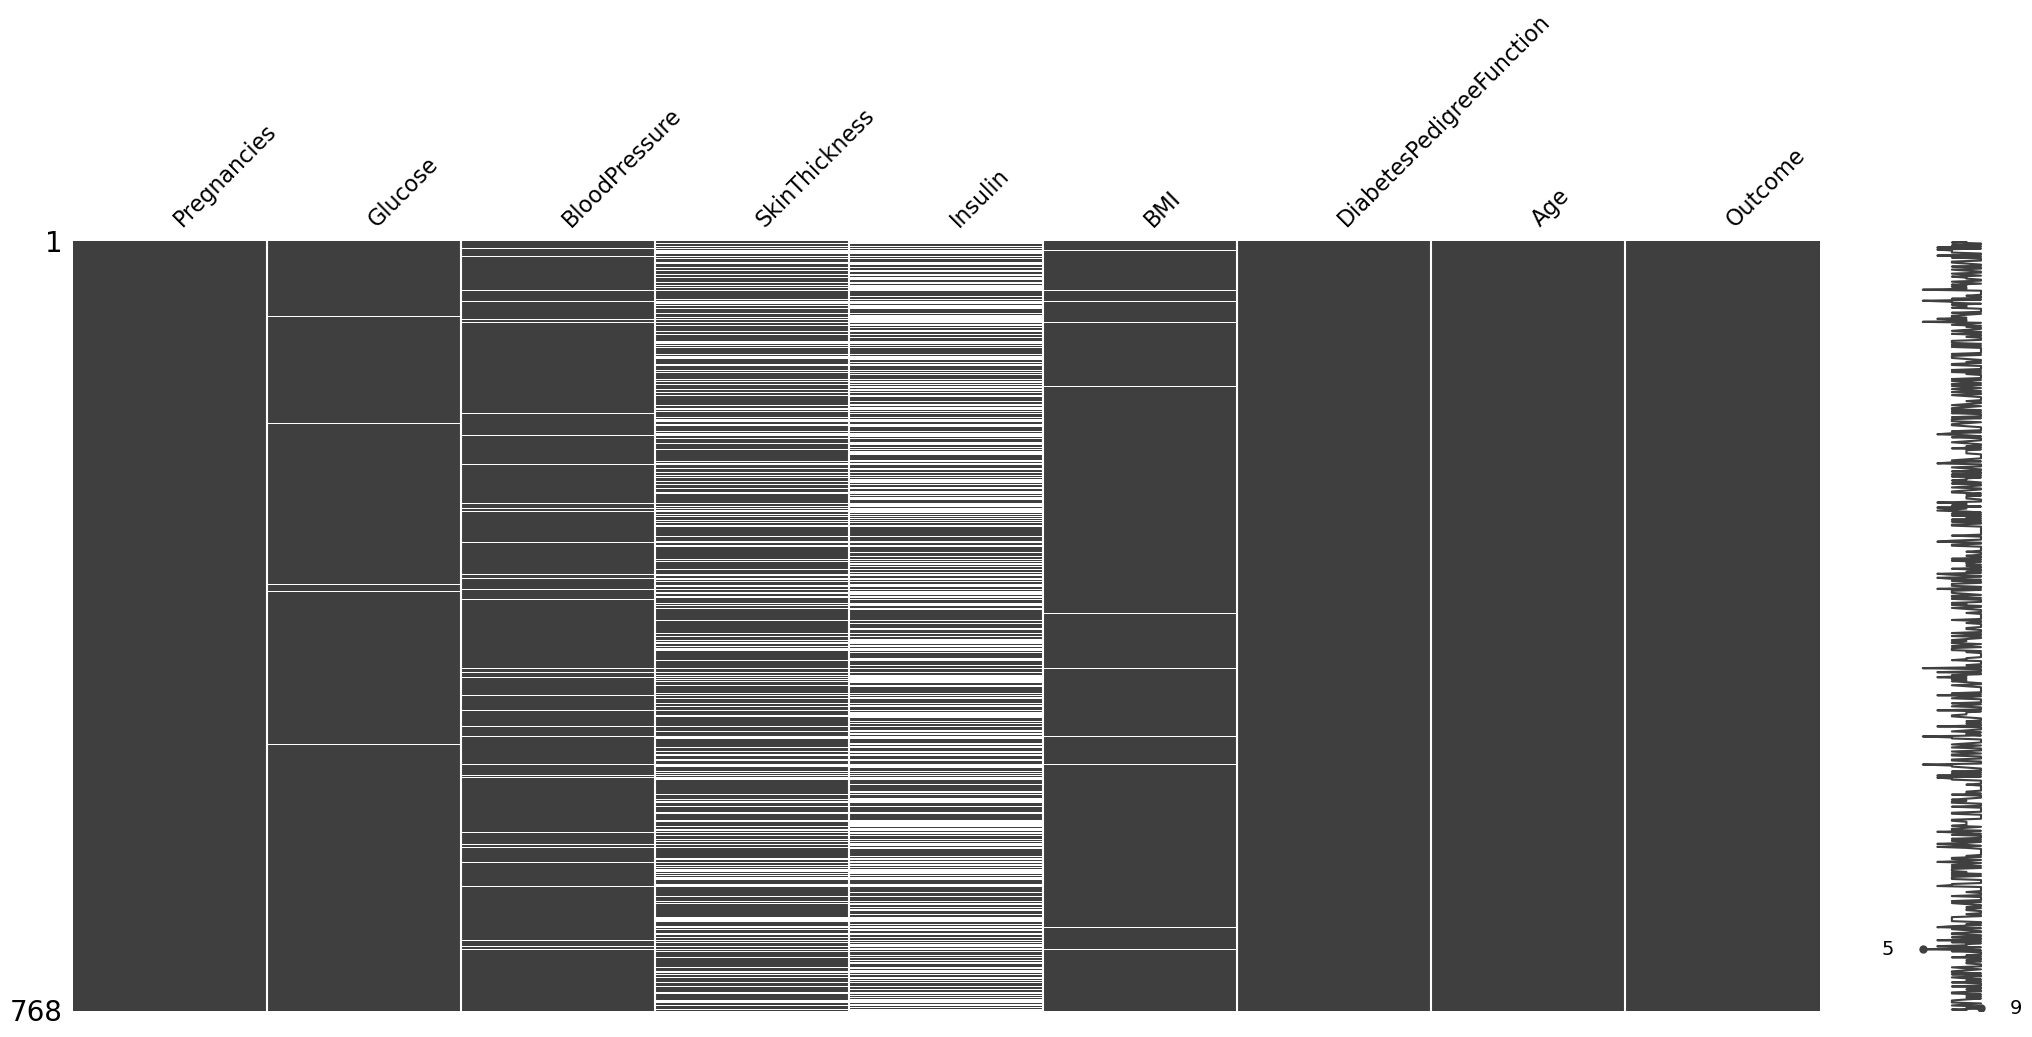

In [82]:
msno.matrix(df)

In [17]:
#remplacer les valeurs manquntes par la médian
columns = df.columns
columns = columns.drop("Outcome")
for col in  columns :
  median = df[col].median()
  df[col] = df[col].fillna(median)


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

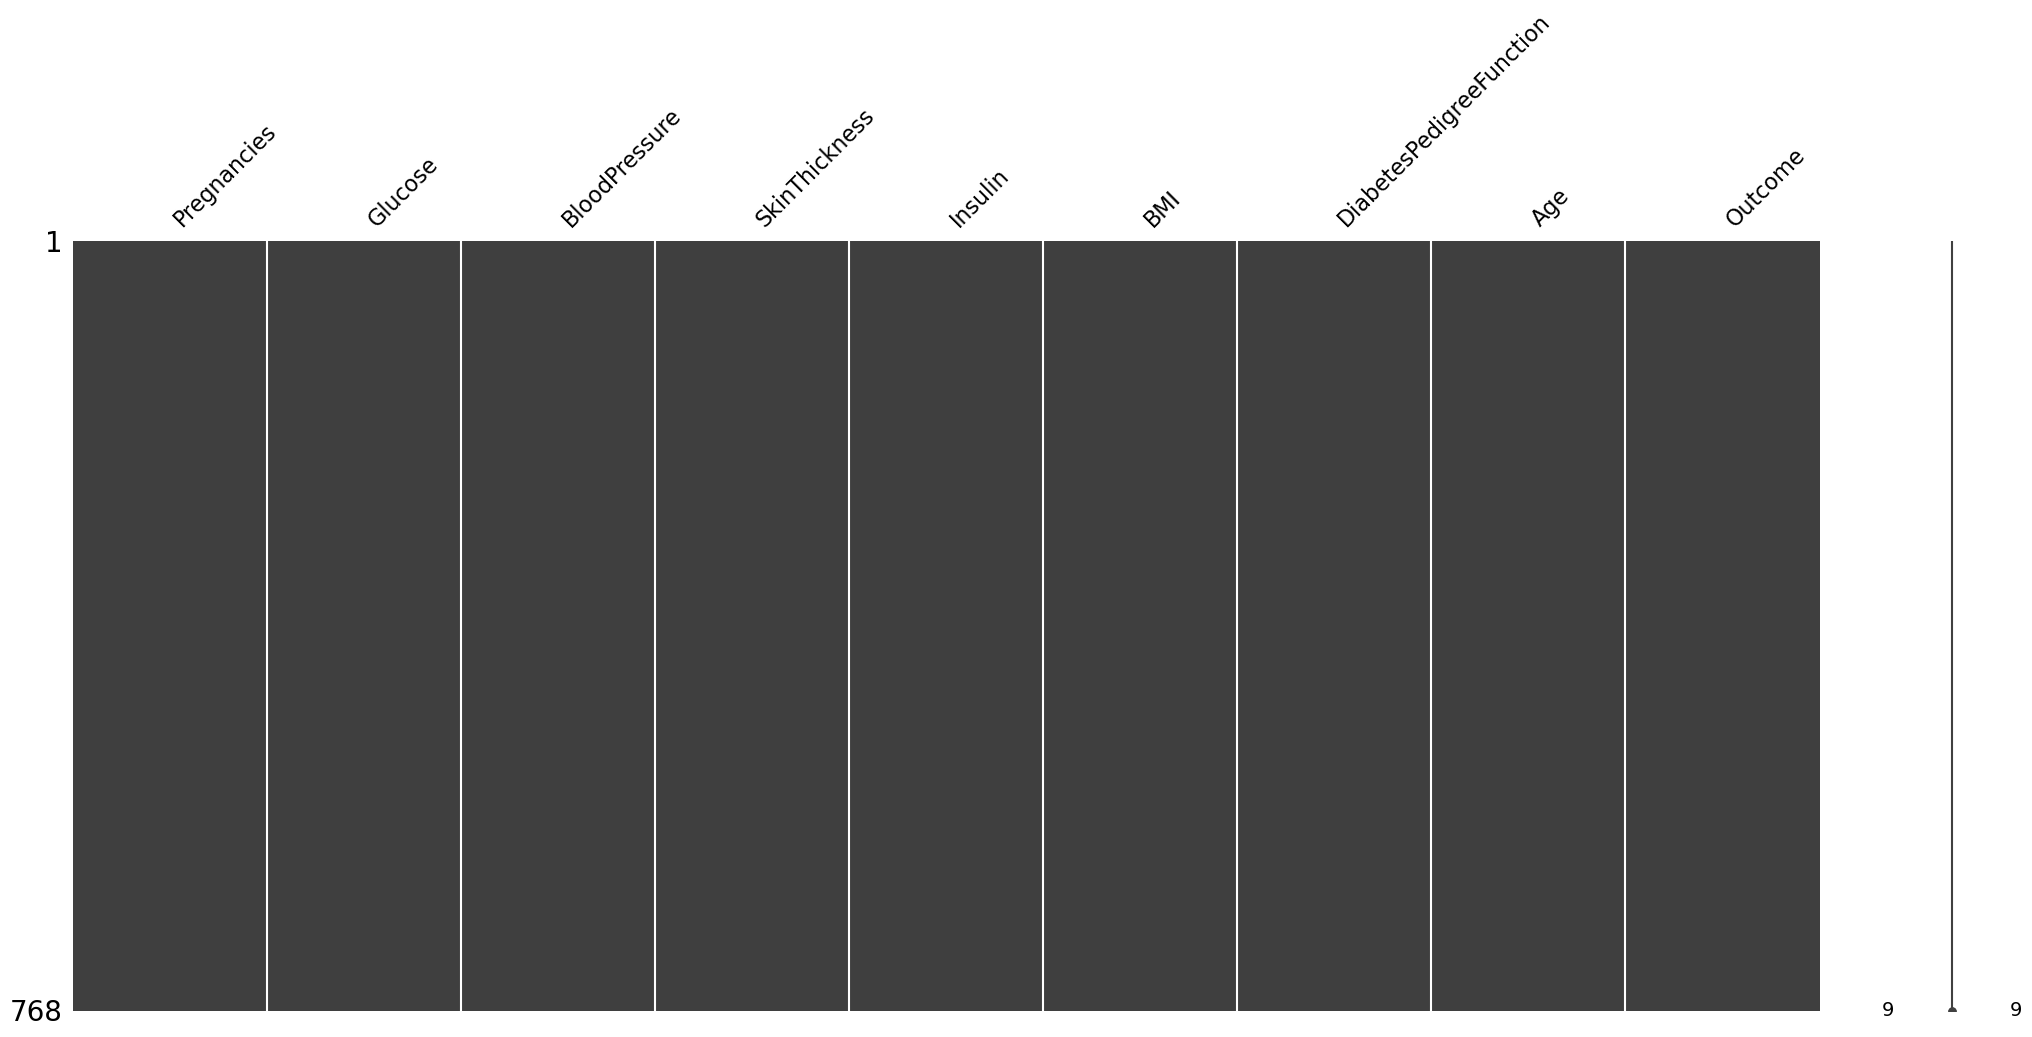

In [20]:
msno.matrix(df)

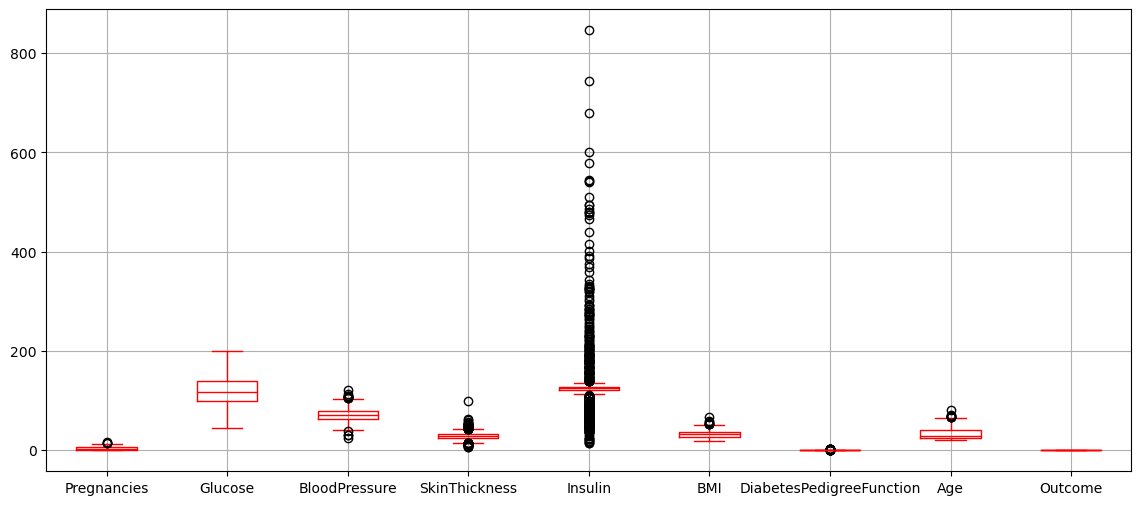

In [21]:
df.boxplot(figsize=(14,6), color ='red')
plt.show()


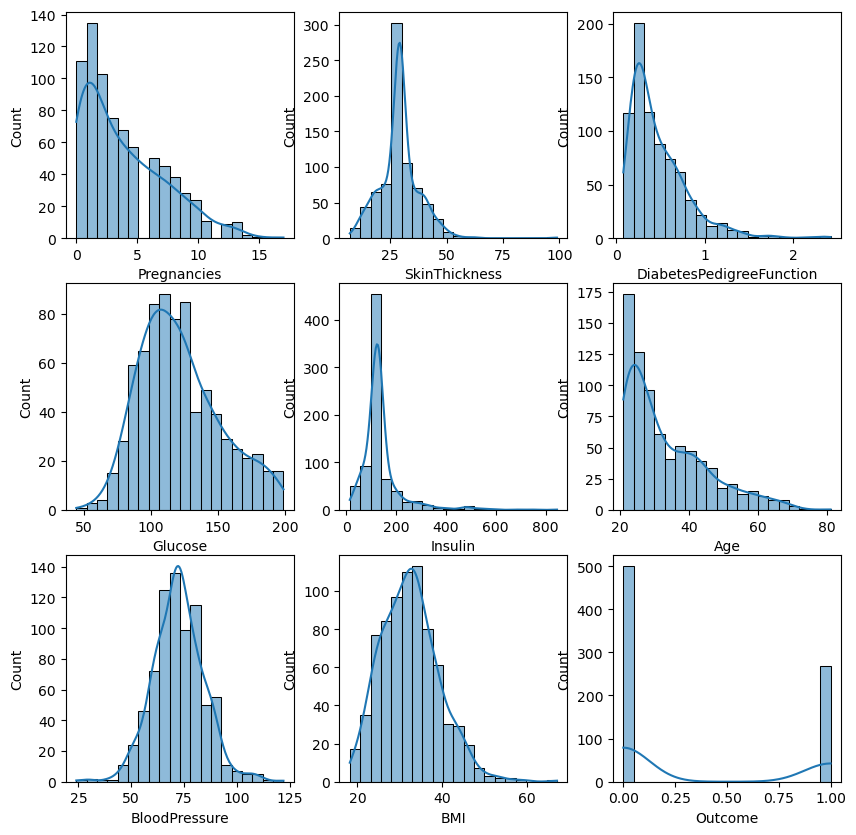

In [22]:
cols = df.columns
fige , ax = plt.subplots(3,3,figsize = (10 ,10))
col_index  = 0
row_index  = 0
for col in cols :
    sns.histplot(df[col],bins = 20, ax = ax[col_index,row_index], kde = 'True')
    col_index = col_index + 1
    if( col_index == 3):
      col_index = 0
      row_index = row_index +1
    
    




<Axes: ylabel='Outcome'>

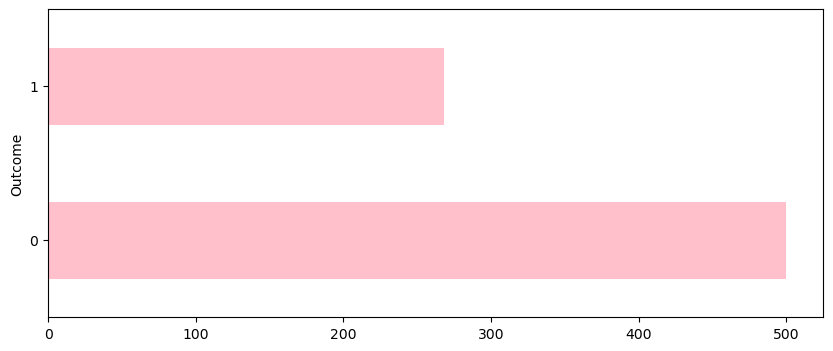

In [23]:
df["Outcome"].value_counts().plot.barh(figsize = (10,4) ,  color ='pink')

In [90]:
pd.crosstab(df['Age'] , df['Outcome'] ,normalize = 'index') *100

Outcome,0,1
Age,,
21,92.063492,7.936508
22,84.722222,15.277778
23,81.578947,18.421053
24,82.608696,17.391304
25,70.833333,29.166667
26,75.757576,24.242424
27,75.000000,25.000000
28,71.428571,28.571429
29,55.172414,44.827586


In [24]:
df_clean = df.copy()
for col in df_clean.select_dtypes(include='number').columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [25]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [33]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,3.054545,118.778788,70.309091,28.318182,129.427273,32.385758,0.483936,29.348485,0.284848
std,2.891670,28.896043,10.960065,10.106062,72.220507,6.225720,0.263933,8.208329,0.452028
min,0.000000,56.000000,44.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,62.000000,20.000000,74.000000,27.825000,0.268250,23.000000,0.000000
50%,2.000000,115.000000,70.000000,28.000000,115.500000,32.850000,0.433500,26.000000,0.000000
75%,4.000000,136.000000,78.000000,36.000000,170.000000,36.500000,0.657000,34.000000,1.000000
max,13.000000,198.000000,102.000000,52.000000,360.000000,47.900000,1.268000,54.000000,1.000000


In [26]:
pd.crosstab(df_clean['Age'] , df_clean['Outcome'] ,normalize = 'index') *100

Outcome,0,1
Age,,
21,92.000000,8.000000
22,83.333333,16.666667
23,63.636364,36.363636
24,84.615385,15.384615
25,76.470588,23.529412
26,75.000000,25.000000
27,76.470588,23.529412
28,83.333333,16.666667
29,66.666667,33.333333


In [27]:
df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


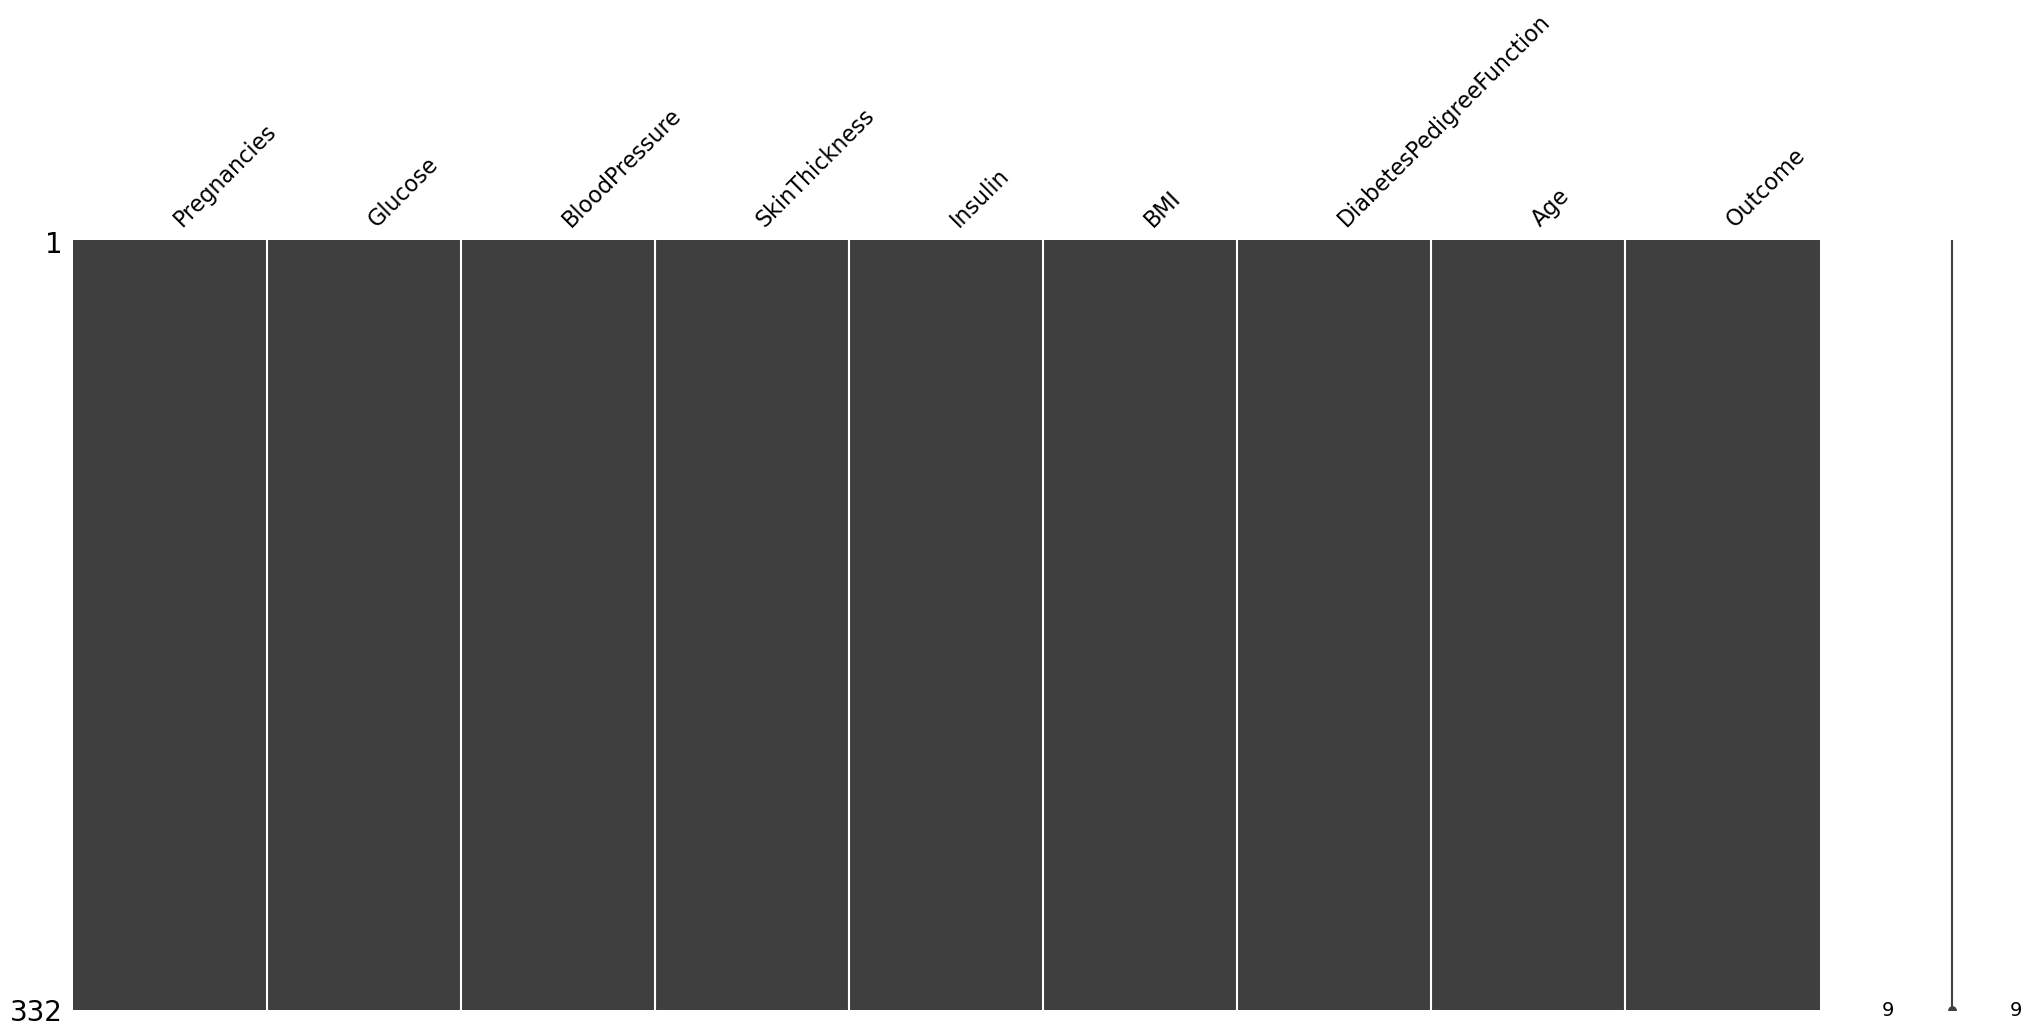

In [28]:
msno.matrix(df_clean)
plt.show()



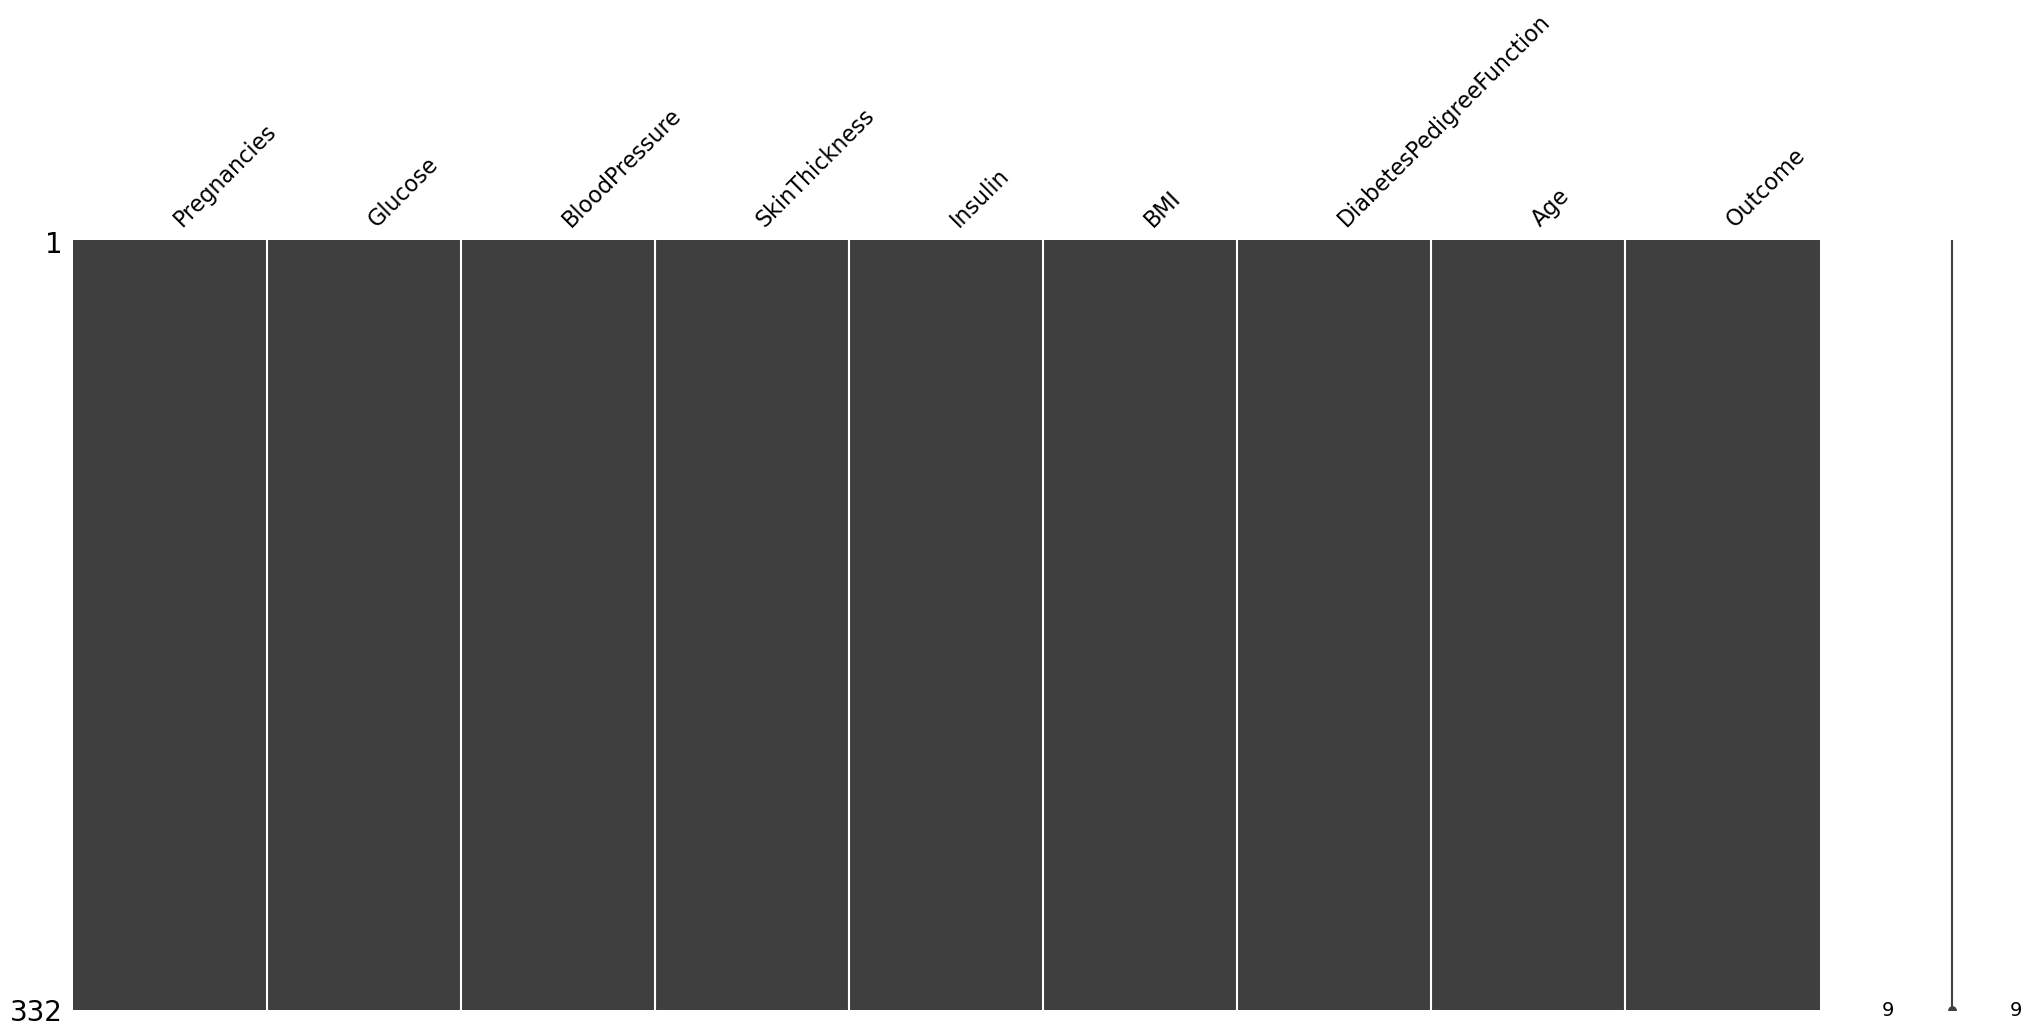

In [97]:
msno.matrix(df_clean)
plt.show()

In [98]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,332.000000,332.000000,332.000000,332.000000,332.0,332.000000,332.000000,332.000000,332.000000
mean,4.361446,118.762048,73.566265,28.933735,125.0,31.383434,0.367702,35.376506,0.346386
std,3.348186,29.193707,10.228735,4.219986,0.0,6.061731,0.215653,12.340332,0.476536
min,0.000000,44.000000,48.000000,15.000000,125.0,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,68.000000,29.000000,125.0,27.075000,0.205750,25.000000,0.000000
50%,4.000000,114.000000,72.000000,29.000000,125.0,31.400000,0.291000,32.000000,0.000000
75%,7.000000,135.250000,80.000000,29.000000,125.0,35.125000,0.501500,42.000000,1.000000
max,13.000000,196.000000,104.000000,42.000000,125.0,47.900000,1.022000,68.000000,1.000000


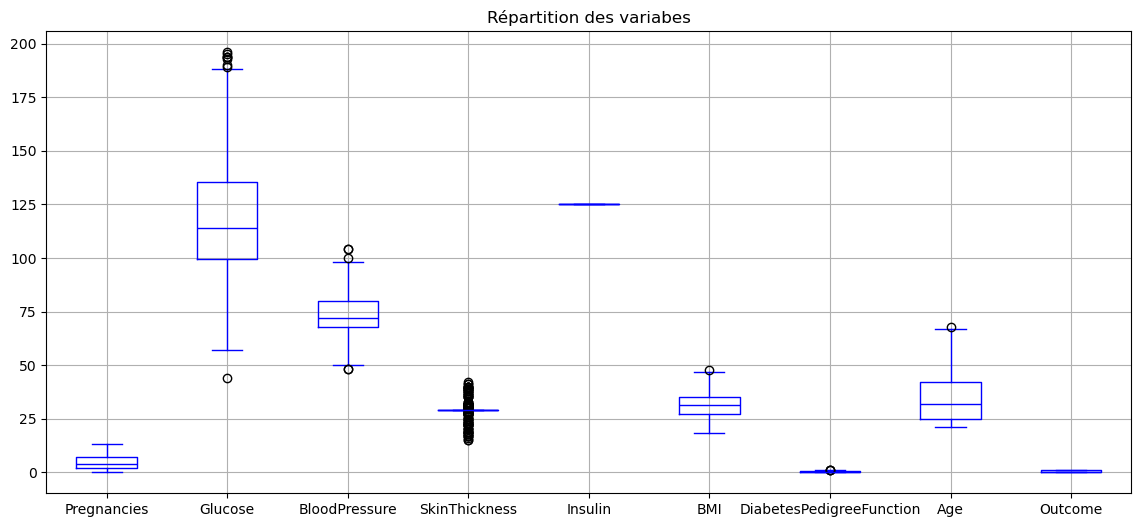

In [29]:
df_clean.boxplot(figsize =(14,6), color = 'blue')
plt.title('Répartition des variabes')
plt.show()               

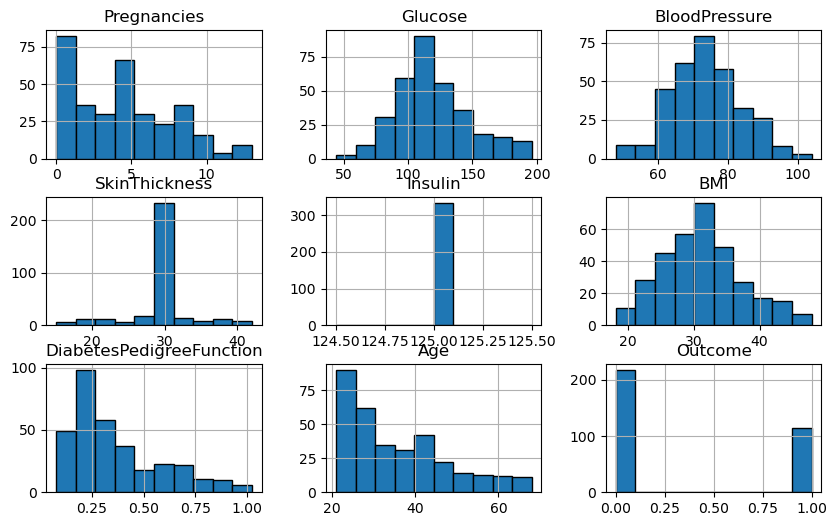

In [100]:
df_clean.hist(figsize = (10,6) , edgecolor ='black')
plt.show()

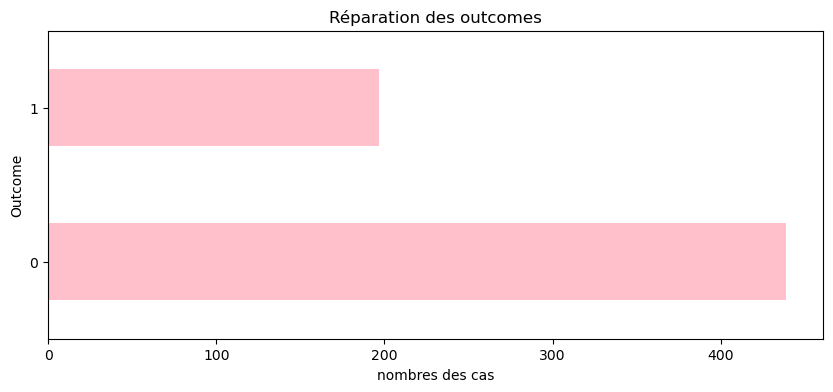

In [87]:
df_clean["Outcome"].value_counts().plot.barh(figsize = (10,4) ,  color ='pink')
plt.title('Réparation des outcomes')
plt.xlabel('nombres des cas')
plt.show()

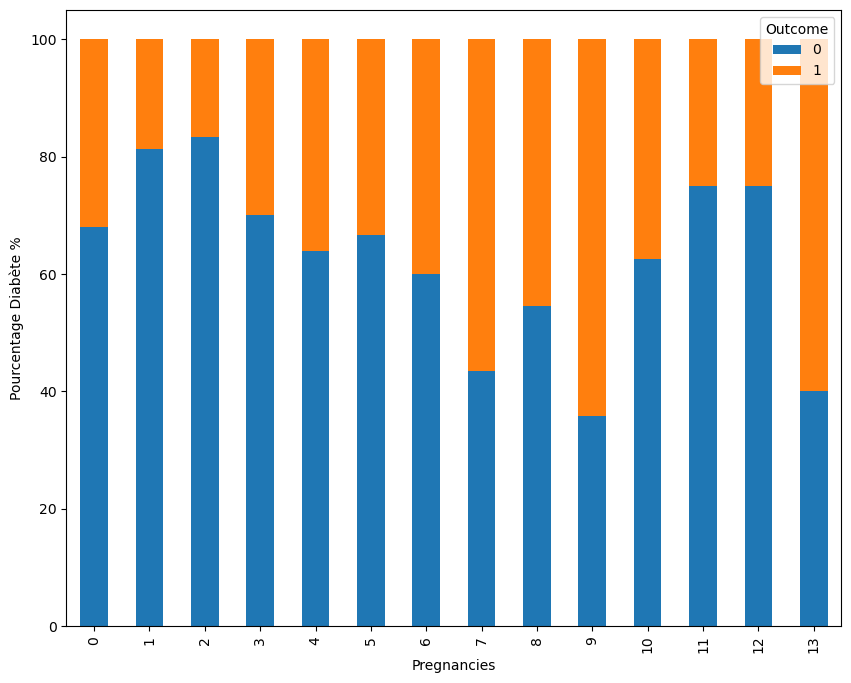

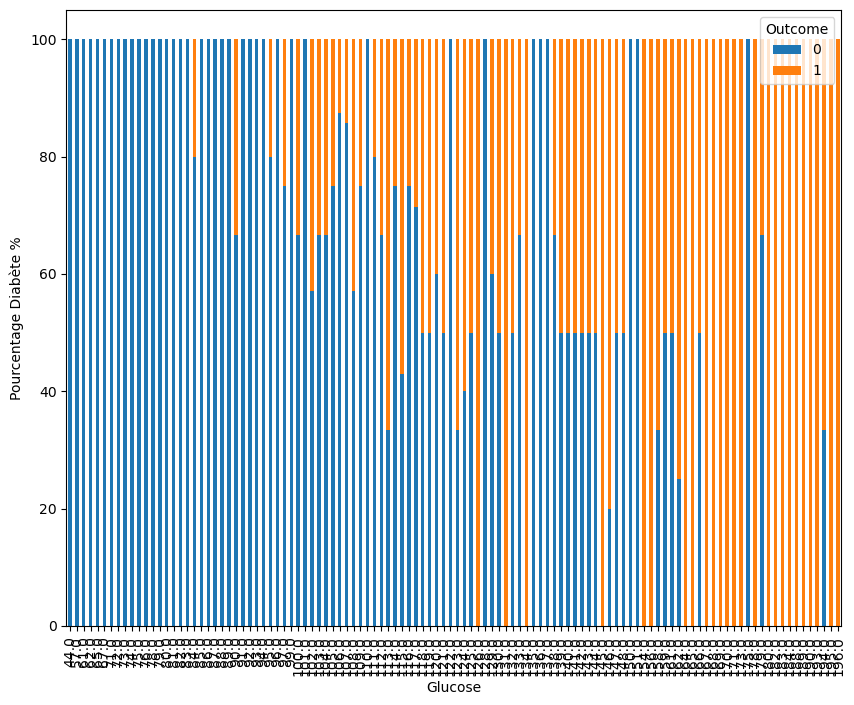

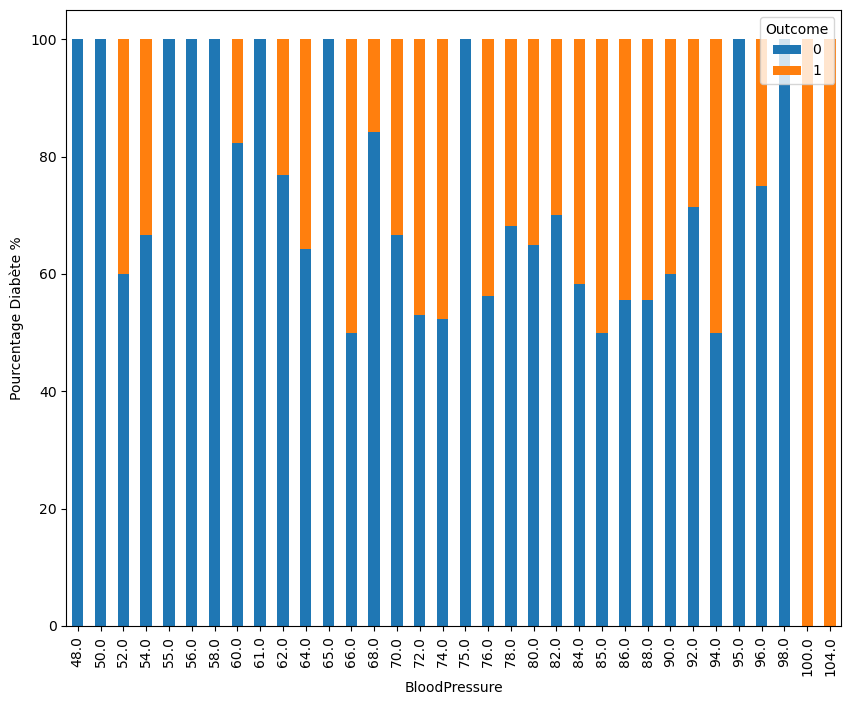

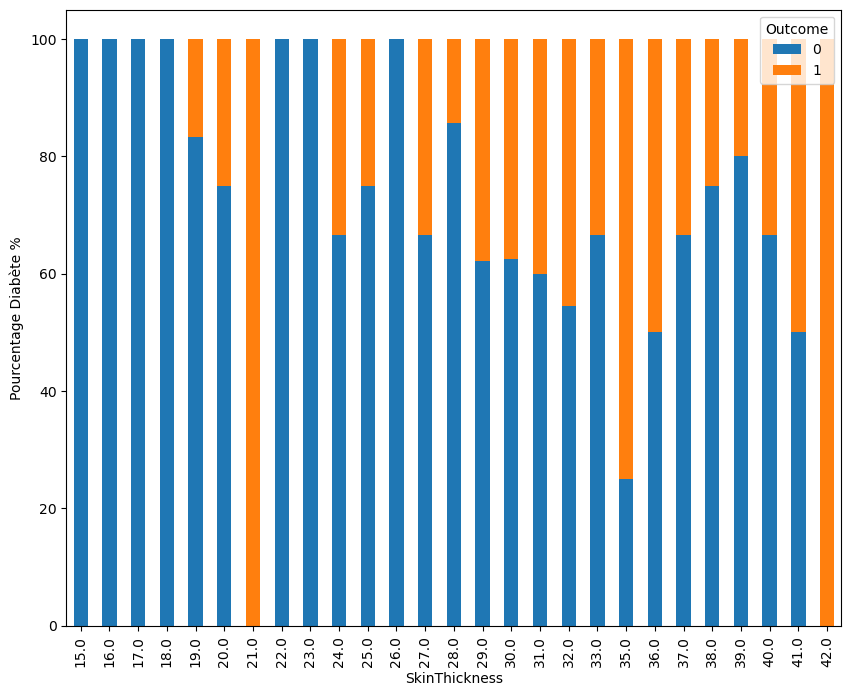

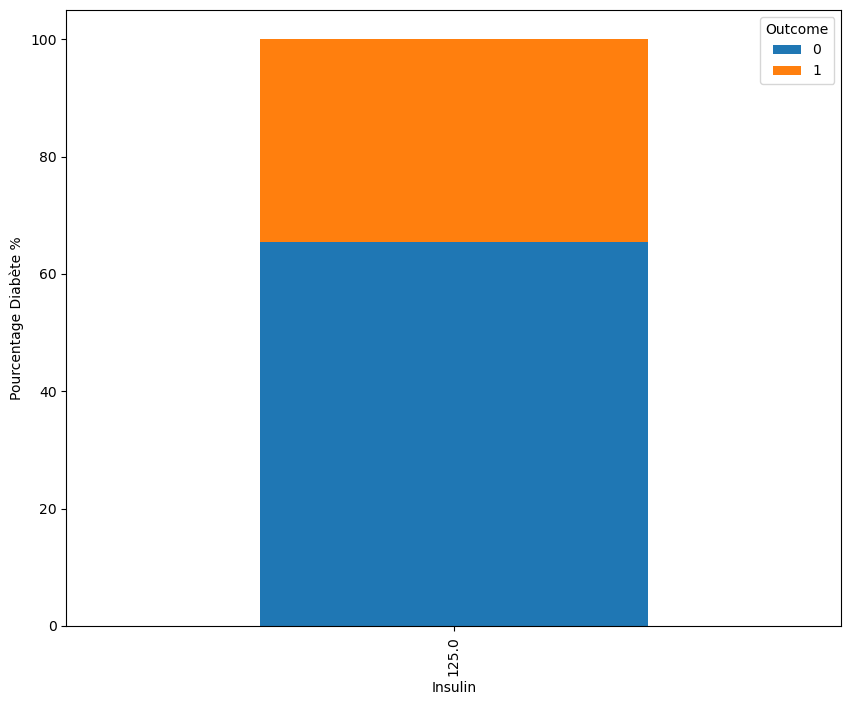

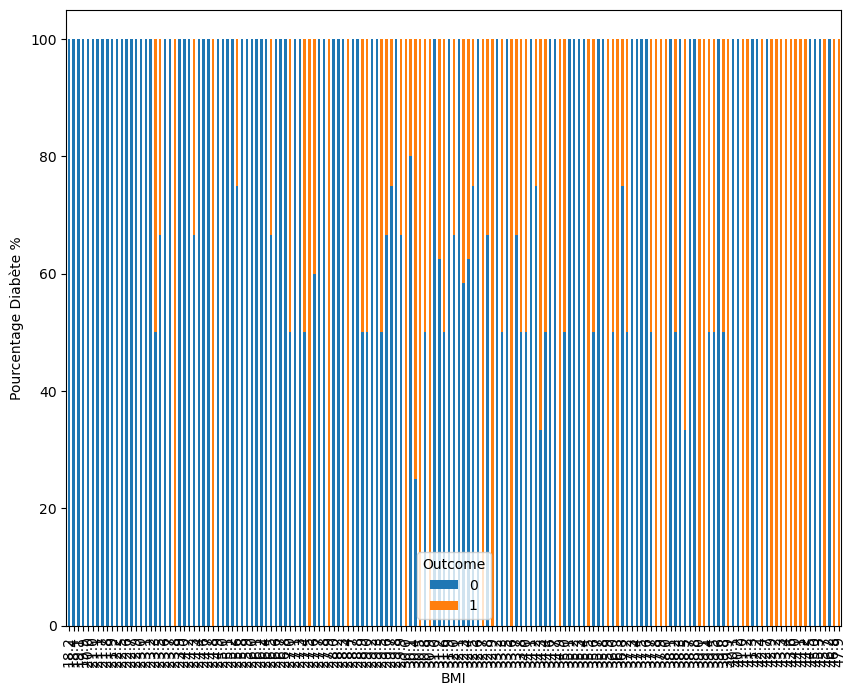

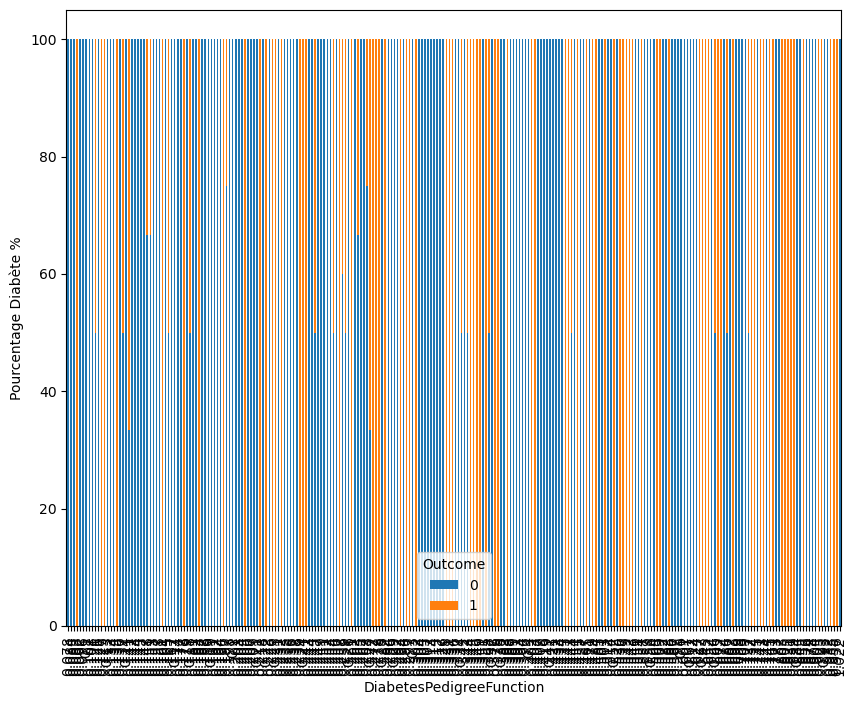

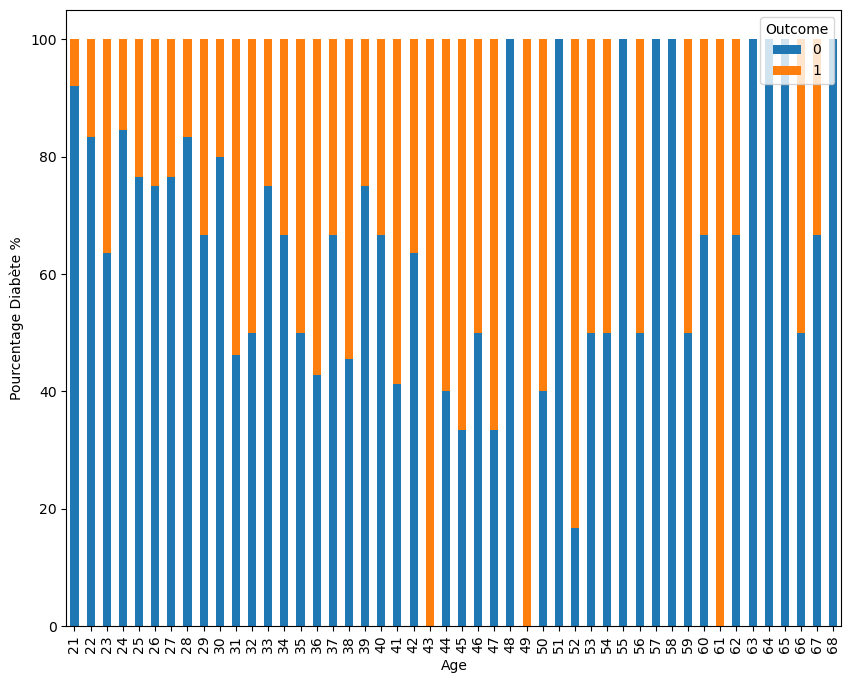

In [30]:
for i in df_clean.columns:
    if i != 'Outcome':
        (pd.crosstab(df_clean[i], df_clean['Outcome'], normalize='index') * 100) \
            .plot(kind='bar', figsize=(10, 8), stacked=True)
        plt.ylabel('Pourcentage Diabète %')
        plt.show()


In [31]:
df_clean.groupby(['Outcome']) [df_clean.columns].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,
0,3.940092,108.658986,72.622120,28.470046,125.0,29.985253,0.340645,33.774194,0.0
1,5.156522,137.826087,75.347826,29.808696,125.0,34.021739,0.418757,38.400000,1.0


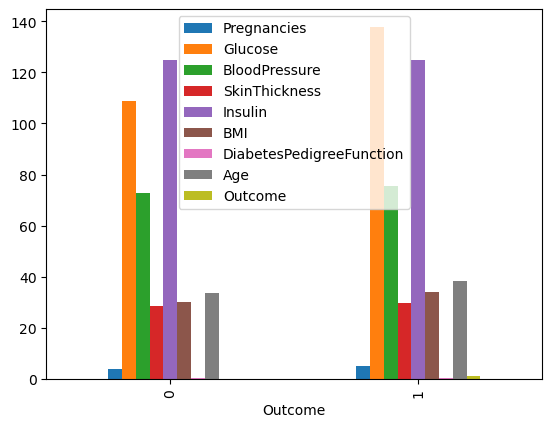

In [32]:
df_clean.groupby(['Outcome'])[df_clean.columns].mean().plot.bar()
plt.show()

In [33]:
y = df_clean['Outcome']
X =df_clean.drop(columns = ['Outcome'])

In [34]:
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 234)

In [36]:
y_train


600    0
183    0
426    0
664    1
321    1
      ..
725    0
5      0
363    1
435    1
757    1
Name: Outcome, Length: 232, dtype: int64

In [37]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
600,1,108.0,88.0,19.0,125.0,27.1,0.400,24
183,5,73.0,60.0,29.0,125.0,26.8,0.268,27
426,0,94.0,72.0,29.0,125.0,32.3,0.256,25
664,6,115.0,60.0,39.0,125.0,33.7,0.245,40
321,3,112.0,74.0,30.0,125.0,31.6,0.197,25
...,...,...,...,...,...,...,...,...
725,4,112.0,78.0,40.0,125.0,39.4,0.236,38
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30
363,4,146.0,78.0,29.0,125.0,38.5,0.520,67
435,0,141.0,72.0,29.0,125.0,42.4,0.205,29


In [38]:
#Standardisation   z=  (x−μ)/ σ


from sklearn.preprocessing import StandardScaler



# Scaling  the data  : création de l'objet StandarScaler()
sc = StandardScaler()

# fit transform on train data : fit + transforme   sur les donnés d'entrainments
X_train_Scaled = sc.fit_transform(X_train)
X_train_Scaled = pd.DataFrame(X_train , columns = X.columns)

#tronsfome on ferme data : transforme sur les données de test 
X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X.columns)

In [112]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
600,1,108.0,88.0,19.0,125.0,27.1,0.400,24
183,5,73.0,60.0,29.0,125.0,26.8,0.268,27
426,0,94.0,72.0,29.0,125.0,32.3,0.256,25
664,6,115.0,60.0,39.0,125.0,33.7,0.245,40
321,3,112.0,74.0,30.0,125.0,31.6,0.197,25


In [39]:
X_train_Scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
600,1,108.0,88.0,19.0,125.0,27.1,0.400,24
183,5,73.0,60.0,29.0,125.0,26.8,0.268,27
426,0,94.0,72.0,29.0,125.0,32.3,0.256,25
664,6,115.0,60.0,39.0,125.0,33.7,0.245,40
321,3,112.0,74.0,30.0,125.0,31.6,0.197,25


In [40]:
# Building the model 
model_lgr  = LogisticRegression(max_iter = 1000)

In [41]:
model_lgr.fit(X_train_Scaled , y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred_train = model_lgr.predict(X_train_Scaled)
y_pred_test = model_lgr.predict(X_test_scaled)

In [43]:
y_pred_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [118]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [44]:
from sklearn import metrics

print('Accuracy' ,metrics.accuracy_score(y_train ,y_pred_train))
print("Precesion" ,metrics.precision_score(y_train , y_pred_train) )
print("recall",metrics.recall_score(y_train , y_pred_train))


Accuracy 0.771551724137931
Precesion 0.7192982456140351
recall 0.5256410256410257


In [45]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.72      0.53      0.61        78

    accuracy                           0.77       232
   macro avg       0.75      0.71      0.72       232
weighted avg       0.77      0.77      0.76       232



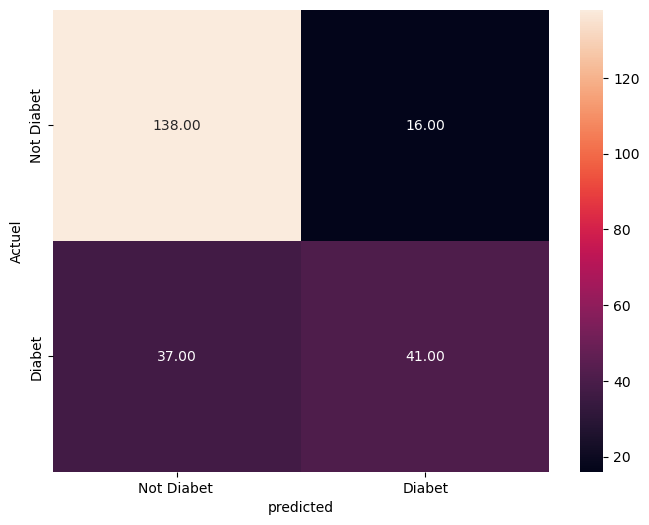

In [47]:
cm= metrics.confusion_matrix(y_train , y_pred_train)
plt.figure(figsize = ( 8 ,6))
sns.heatmap(cm, annot = True , fmt='.2f' ,xticklabels =['Not Diabet ' , 'Diabet'] ,yticklabels = ['Not Diabet' , 'Diabet'])
plt.xlabel('predicted')
plt.ylabel('Actuel')
plt.show()

In [48]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        63
           1       0.53      0.68      0.60        37

    accuracy                           0.66       100
   macro avg       0.65      0.66      0.65       100
weighted avg       0.68      0.66      0.67       100



In [73]:
# matric fonction
def metrics_score(actual , predicted) :
    print(classification_report(actual , predicted))
    cm = metrics.confusion_matrix(actual , predicted)
    plt.figure(figsize = (10 ,8) )
    sns.heatmap(cm, annot = True , fmt='.2f' ,xticklabels =['Not Diabet ' , 'Diabet'] ,yticklabels = ['Not Diabet' , 'Diabet'] , cmap = 'pink')
    plt.xlabel('predicted')
    plt.ylabel('Actuel')
    plt.show()
    return cm
    
    

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.72      0.53      0.61        78

    accuracy                           0.77       232
   macro avg       0.75      0.71      0.72       232
weighted avg       0.77      0.77      0.76       232



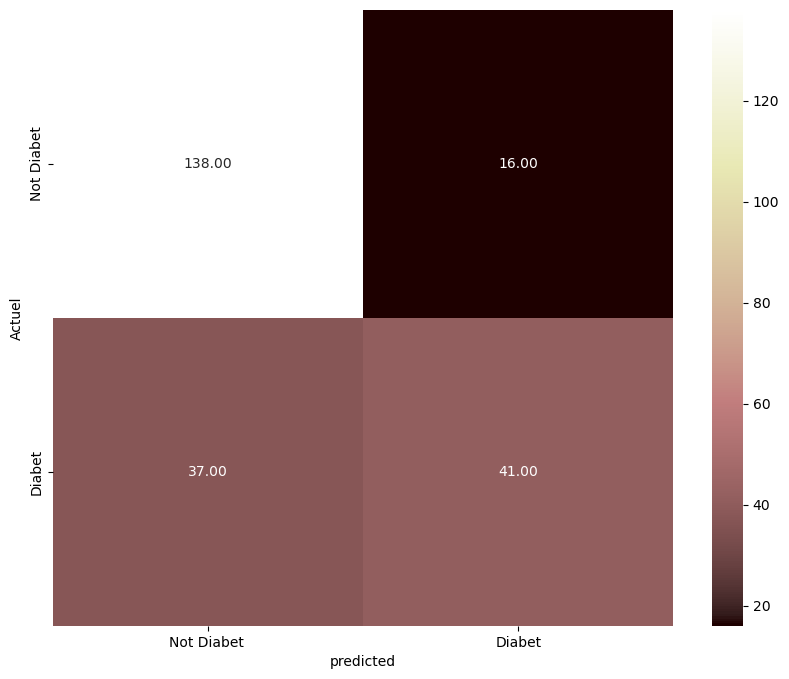

array([[138,  16],
       [ 37,  41]], dtype=int64)

In [74]:
metrics_score(y_train,y_pred_train)



              precision    recall  f1-score   support

           0       0.77      0.65      0.71        63
           1       0.53      0.68      0.60        37

    accuracy                           0.66       100
   macro avg       0.65      0.66      0.65       100
weighted avg       0.68      0.66      0.67       100



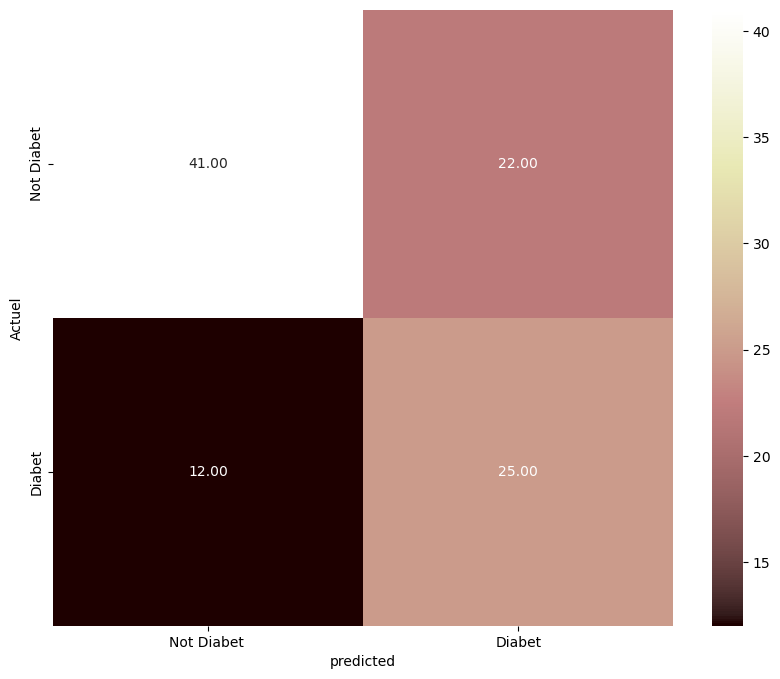

In [51]:
metrics_score(y_test,y_pred_test)

In [53]:
cols = X.columns
coef_lg = model_lgr.coef_
coefs =pd.DataFrame(coef_lg ,columns = cols).T.sort_values(by = 0, ascending = False)
coefs

,0
DiabetesPedigreeFunction,0.630623
Pregnancies,0.132700
BMI,0.115309
Glucose,0.043373
Age,-0.007398
SkinThickness,-0.011058
BloodPressure,-0.029865
Insulin,-0.061638


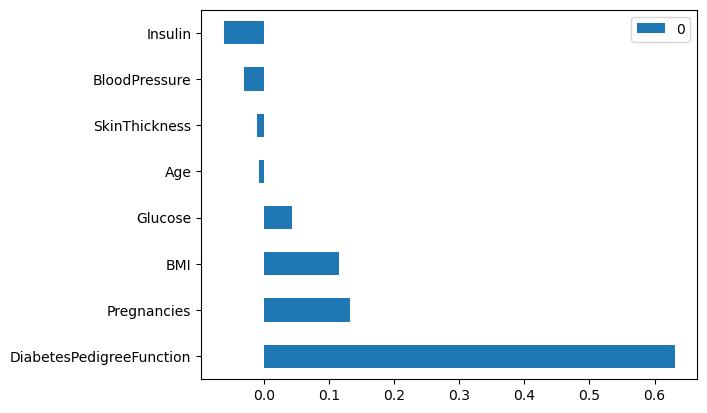

In [54]:
coefs.plot.barh()
plt.show()


In [55]:
# fiding the odds
odds = np.exp(model_lgr.coef_[0])
# Adding the odds to DataFrame and  sorting  the values
df_odds = pd.DataFrame(odds, X_train_Scaled .columns, columns = ['odds']).sort_values(by= 'odds', ascending = False)
df_odds

,odds
DiabetesPedigreeFunction,1.878780
Pregnancies,1.141907
BMI,1.122220
Glucose,1.044327
Age,0.992629
SkinThickness,0.989003
BloodPressure,0.970577
Insulin,0.940224


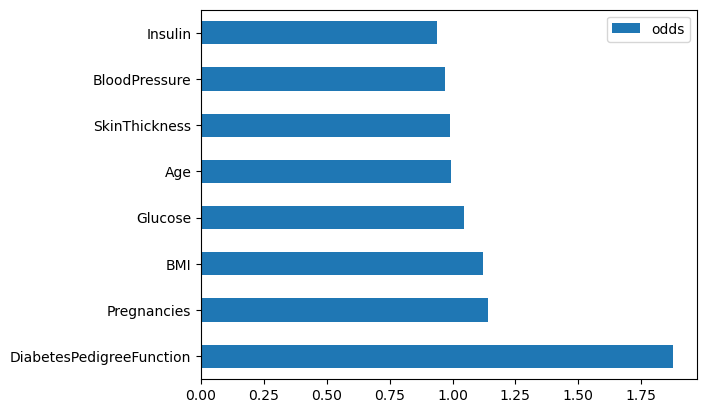

In [56]:
df_odds.plot.barh()
plt.show()

In [59]:
 from sklearn.pipeline import Pipeline
import joblib
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train_Scaled, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.72      0.53      0.61        78

    accuracy                           0.77       232
   macro avg       0.75      0.71      0.72       232
weighted avg       0.77      0.77      0.76       232



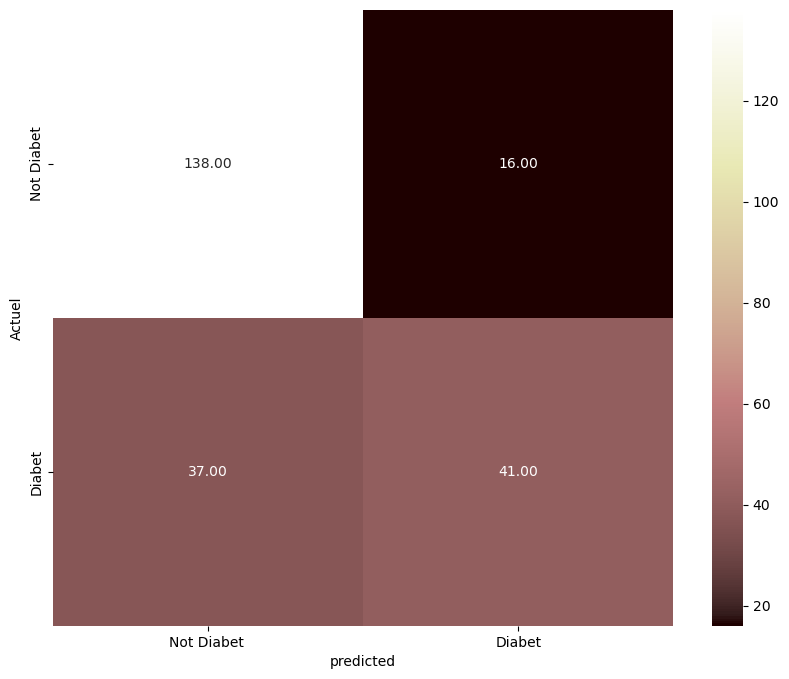

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        63
           1       0.53      0.68      0.60        37

    accuracy                           0.66       100
   macro avg       0.65      0.66      0.65       100
weighted avg       0.68      0.66      0.67       100



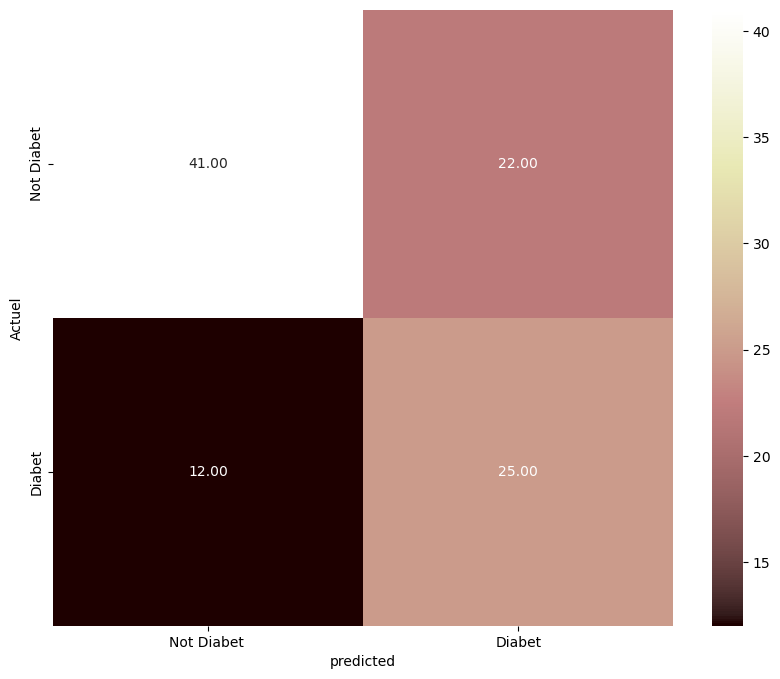

In [78]:
from sklearn import metrics
from sklearn.metrics import classification_report
import joblib


cm_train = metrics_score(y_train, y_pred_train).tolist()
cm_test = metrics_score(y_test, y_pred_test).tolist()

results = {
    'pipeline': pipeline,  # pipeline pour prédictions futures
    'metrics_train': {
        'accuracy': metrics.accuracy_score(y_train, y_pred_train),
        'precision': metrics.precision_score(y_train, y_pred_train),
        'recall': metrics.recall_score(y_train, y_pred_train),
        'classification_report': classification_report(y_train, y_pred_train, output_dict=True),
        'confusion_matrix': cm_train
    },
    'metrics_test': {
        'accuracy': metrics.accuracy_score(y_test, y_pred_test),
        'precision': metrics.precision_score(y_test, y_pred_test),
        'recall': metrics.recall_score(y_test, y_pred_test),
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
        'confusion_matrix': cm_test
    }
}




In [79]:

joblib.dump(results, 'full_pipeline_diabetes.pkl')
print(" Pipeline et résultats sauvegardés dans full_pipeline_diabetes.pkl")


 Pipeline et résultats sauvegardés dans full_pipeline_diabetes.pkl
